#### Problem Statement

Predicting Survival in the Titanic Data Set

#### Data

We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

#### Importing Necessary Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading Data

In [23]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Description of data

In [24]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Seems there are null values in "Age" column

In [25]:
titanic['Age'].fillna(round(titanic['Age'].mean()),inplace=True)

In [26]:
titanic['Age'].count()

891

#### Feature Selection

In [27]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The Mentioned columns are nothing to with prediction. So we remove all those columns, 
1. PassengerId 
2. Name
3. Ticket 
4. Cabin 
5. Embarked 

In [28]:
titanic.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'],inplace=True)

In [29]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [32]:
for column in titanic.drop(columns=['Age','Fare']):
    print(titanic[column].value_counts())
    print('-------------------------------------------')

0    549
1    342
Name: Survived, dtype: int64
-------------------------------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
-------------------------------------------
male      577
female    314
Name: Sex, dtype: int64
-------------------------------------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
-------------------------------------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
-------------------------------------------


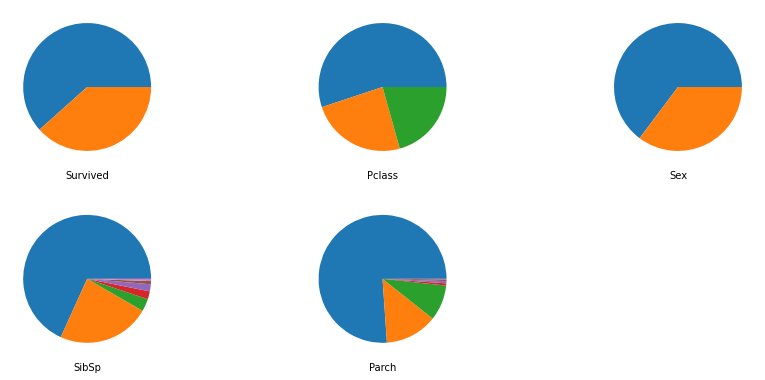

In [46]:
plt.figure(figsize=(15,10))
plotnumber = 1

for column in titanic.drop(columns=['Age','Fare']):
    plt.subplot(3,3,plotnumber)
    plt.pie(titanic[column].value_counts())
    plt.xlabel(column)
    plotnumber+=1
plt.show()

In [49]:
titanic['Sex'].replace('male',1,inplace=True)
titanic['Sex'].replace('female',0,inplace=True)

In [50]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


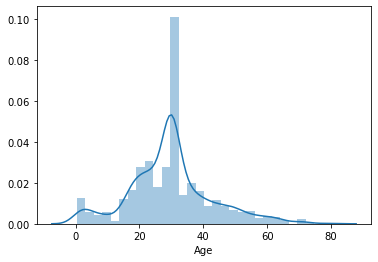

In [54]:
sns.distplot(titanic.Age)

In [51]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
features = list(X.columns)
class_name = list(y_train.unique())
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [59]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install pydotplus

  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=562e066f91e7a1842b8e469a06c6f6fef0bf518d2fa45b2430631df7d904d499
  Stored in directory: c:\users\appcloud\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [73]:
import graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [75]:
dot_data = export_graphviz(dt,feature_names = features,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [76]:
dt.score(x_train,y_train)

0.9873595505617978

In [77]:
y_pred = dt.predict(x_test)

In [78]:
dt.score(x_test,y_test)

0.7430167597765364

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_transform = scaler.fit_transform(X)
x_transform

array([[ 0.82737724,  0.73769513, -0.59705478,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.56610693, -1.35557354,  0.63416229,  0.43279337, -0.47367361,
         0.78684529],
       [ 0.82737724, -1.35557354, -0.28925051, -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 0.82737724, -1.35557354,  0.01855376,  0.43279337,  2.00893337,
        -0.17626324],
       [-1.56610693,  0.73769513, -0.28925051, -0.4745452 , -0.47367361,
        -0.04438104],
       [ 0.82737724,  0.73769513,  0.17245589, -0.4745452 , -0.47367361,
        -0.49237783]])

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size=0.2,random_state=1)

In [81]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [82]:
dt.score(x_train,y_train)

0.9873595505617978

In [83]:
y_pred1 = dt.predict(x_test)

In [84]:
dt.score(x_test,y_test)

0.7374301675977654

In [85]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [88]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=dt,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [89]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [90]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 8, 'min_samples_split': 7, 'splitter': 'random'}


In [91]:
grid_search.best_score_

0.8342657342657341

In [92]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth =29, min_samples_leaf= 8, min_samples_split= 7, splitter ='random')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=29, min_samples_leaf=8,
                       min_samples_split=7, splitter='random')

In [93]:
dt.score(x_train,y_train)

0.800561797752809

In [94]:
dt.score(x_test,y_test)

0.7262569832402235

In [95]:
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(dt,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)
